In [1]:
from citipy import citipy
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
from api_keys import weather_api_key
import random
from datetime import datetime
import scipy.stats as sts

In [2]:
range_lat = (-90.00, 90.00)
range_lng = (-180.00, 180.00)

city_dict = {}

# random.seed(0)

i = 1
ran_length = random.randint(500,600)

while len(city_dict) < ran_length: # change this after script completion for ran_length
    rand_lat = round(random.uniform(range_lat[0], range_lat[1]), 2)
    rand_lng = round(random.uniform(range_lng[0], range_lng[1]), 2)
    
    city = citipy.nearest_city(rand_lat, rand_lng)
    
    if city.city_name in city_dict:
        pass
    else:
        city_dict[city.city_name] = (i, city.country_code, rand_lat, rand_lng)
        i += 1    

# city_dict

In [3]:
url_base = "http://api.openweathermap.org/data/2.5/weather?"

weather_dict = {}

city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date_unix = []
date = []
city_na = []
for key in city_dict:
    
    url_query = f"{url_base}q={key}&appid={weather_api_key}&units=metric"
    
    request = requests.get(url_query)
    weather_dict[key] = (request.json())
    
    try:
        city.append(weather_dict[key]["name"])
        lat.append(float(weather_dict[key]["coord"]["lat"]))
        lng.append(float(weather_dict[key]["coord"]["lon"]))
        max_temp.append(float(weather_dict[key]["main"]["temp_max"]))
        humidity.append(float(weather_dict[key]["main"]["humidity"]))
        cloudiness.append(int(weather_dict[key]["clouds"]["all"]))
        wind_speed.append(float(weather_dict[key]["wind"]["speed"]))
        country.append(weather_dict[key]["sys"]["country"])
        date_unix.append(int(weather_dict[key]["dt"]))
        date.append(datetime.utcfromtimestamp(int(weather_dict[key]["dt"])).strftime('%Y-%m-%d %H:%M:%S'))
        print(f"Request {str(city_dict[key][0]).rjust(3, '0')} of {len(city_dict)} | AVAILABLE:     COMPLETE [{request}] ---> {key}")
        
    except KeyError:
        city_na.append(key)
        print(f"Request {str(city_dict[key][0]).rjust(3, '0')} of {len(city_dict)} | NOT AVAILABLE: COMPLETE [{request}] ---> {key}")

Request 001 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> nyurba
Request 002 of 542 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> mys shmidta
Request 003 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> ranong
Request 004 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> alice springs
Request 005 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> komsomolskiy
Request 006 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> melfort
Request 007 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> tura
Request 008 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> bethel
Request 009 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> champerico
Request 010 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> hay river
Request 011 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> hamilton
Request 012 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> vaini
Request 013 of 542 | AVAILABLE:     COMPLETE [<Response [200]>]

Request 106 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> alofi
Request 107 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> intipuca
Request 108 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> sur
Request 109 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kahului
Request 110 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> ambon
Request 111 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> waitati
Request 112 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> huarmey
Request 113 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> laredo
Request 114 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> hobart
Request 115 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> katsuura
Request 116 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> bambous virieux
Request 117 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> nikolskoye
Request 118 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> yerb

Request 211 of 542 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> macaboboni
Request 212 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> puerto leguizamo
Request 213 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> channel-port aux basques
Request 214 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> broome
Request 215 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> lachi
Request 216 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> sao joao da barra
Request 217 of 542 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> higuey
Request 218 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> batie
Request 219 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kibala
Request 220 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> nome
Request 221 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> mackenzie
Request 222 of 542 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> umzimvubu
Request 223 of 542 | NOT AVAILABLE: COMPLET

Request 315 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> turbat
Request 316 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> ligayan
Request 317 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> funadhoo
Request 318 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> severo-kurilsk
Request 319 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> poyarkovo
Request 320 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> penzance
Request 321 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> tupiza
Request 322 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> aasiaat
Request 323 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kaeo
Request 324 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> corn island
Request 325 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> were ilu
Request 326 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> taoudenni
Request 327 of 542 | AVAILABLE:     COMPLETE [<Response [200]>]

Request 420 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> yantai
Request 421 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> atbasar
Request 422 of 542 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> tuggurt
Request 423 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> quatre cocos
Request 424 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kerema
Request 425 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> mapiripan
Request 426 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> tilichiki
Request 427 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> basco
Request 428 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> nizhniy baskunchak
Request 429 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> teknaf
Request 430 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kununurra
Request 431 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> grants pass
Request 432 of 542 | AVAILABLE:     COMPLETE [<Response

Request 525 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> san francisco
Request 526 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> biograd na moru
Request 527 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> jertih
Request 528 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> esperance
Request 529 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> hualmay
Request 530 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> udachnyy
Request 531 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> yataity
Request 532 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> oranjemund
Request 533 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> coahuayana
Request 534 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> nemuro
Request 535 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> anadyr
Request 536 of 542 | AVAILABLE:     COMPLETE [<Response [200]>] ---> mehamn
Request 537 of 542 | AVAILABLE:     COMPLETE [<Response [

In [4]:
# Cities not found in OpenWeatherAPI
len_cities_na = len(city_na)

if len_cities_na == 0:
    print(f"All cities were found in the OpenWeather database")
else:
    if len_cities_na == 1:
        print(f"The following city was not found in the OpenWeather database:\n")
    else:
        print(f"The following {len_cities_na} cities were not found in the OpenWeather database:\n")
    for index, element in enumerate(city_na):
        print(f"{index+1}.- {element}")

The following 48 cities were not found in the OpenWeather database:

1.- mys shmidta
2.- burkhala
3.- vaitupu
4.- grand river south east
5.- taolanaro
6.- saleaula
7.- belushya guba
8.- kamenskoye
9.- nizhneyansk
10.- meyungs
11.- artyk
12.- palabuhanratu
13.- illoqqortoormiut
14.- amderma
15.- tsihombe
16.- attawapiskat
17.- barbar
18.- macaboboni
19.- higuey
20.- umzimvubu
21.- barentsburg
22.- sug-aksy
23.- saryshagan
24.- sahrak
25.- rungata
26.- geresk
27.- juifang
28.- yefira
29.- angra
30.- ruatoria
31.- karaul
32.- sentyabrskiy
33.- grand centre
34.- ngukurr
35.- karkaralinsk
36.- ambodifototra
37.- samusu
38.- tabiauea
39.- tuggurt
40.- chikoy
41.- yomitan
42.- mutsamudu
43.- wahran
44.- marcona
45.- agva
46.- balimo
47.- bolungarvik
48.- sorvag


In [5]:
city_df = pd.DataFrame({
    "City": city,
    "Latitude": lat,
    "Longitude": lng,
    "Max. Temperature (C)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (m/s)": wind_speed,
    "Country": country,
    "Date (unix-UTC)": date_unix,
    "Date": date
})

study_date = city_df["Date"][0][0:10]

# Saving the df as a csv
city_df.to_csv("Data/city_df.csv", encoding = "utf-8", index = False)
city_df

,City,Latitude,Longitude,Max. Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date (unix-UTC),Date
0,Nyurba,63.2842,118.3319,0.75,98.0,100,3.07,RU,1635172466,2021-10-25 14:34:26
1,Ranong,9.9658,98.6348,25.53,89.0,100,1.94,TH,1635172468,2021-10-25 14:34:28
2,Alice Springs,-23.7000,133.8833,24.75,23.0,21,3.09,AU,1635172468,2021-10-25 14:34:28
3,Yangi Marg`ilon,40.4272,71.7189,12.40,28.0,0,1.03,UZ,1635172469,2021-10-25 14:34:29
4,Melfort,52.8667,-104.6177,3.42,78.0,100,8.58,CA,1635172469,2021-10-25 14:34:29
...,...,...,...,...,...,...,...,...,...,...
489,Belyy Yar,53.6039,91.3903,7.94,66.0,100,3.00,RU,1635172990,2021-10-25 14:43:10
490,La Romana,18.4273,-68.9728,29.20,84.0,40,2.06,DO,1635172992,2021-10-25 14:43:12
491,Bulungu,-4.5500,18.6000,23.04,91.0,100,1.47,CD,1635172993,2021-10-25 14:43:13
492,Springe,52.2085,9.5542,14.25,63.0,61,2.46,DE,1635172994,2021-10-25 14:43:14


In [6]:
# Statistics of the DataFrame
summary_sts = city_df.describe()
summary_sts


,Latitude,Longitude,Max. Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Date (unix-UTC)
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02
mean,19.656028,14.400111,16.503421,70.504049,54.471660,3.554980,1.635173e+09
std,33.744575,92.814618,12.642977,21.837752,38.835303,2.696284,1.750609e+02
min,-54.800000,-179.166700,-28.030000,7.000000,0.000000,0.000000,1.635172e+09
25%,-8.178750,-68.205975,8.047500,59.000000,13.250000,1.545000,1.635173e+09
50%,22.180350,18.145250,19.745000,76.000000,60.500000,2.905000,1.635173e+09
75%,49.594400,94.862475,26.105000,88.000000,93.750000,4.902500,1.635173e+09
max,78.218600,179.316700,38.490000,100.000000,100.000000,19.030000,1.635173e+09


In [7]:
# Removing cities where the humidity > 100%

if len(city_df["City"][city_df["Humidity (%)"] > 100]) != 0:
    print(f"The following city/cities was/were removed:\n")
    print(city_df["City"][city_df["Humidity (%)"] > 100])
    city_df = city_df.drop(city_df[city_df["Humidity (%)"] > 100].index).reset_index(drop = True)
else:
    print("Humidity inpsection successfully passed.")


Humidity inpsection successfully passed.


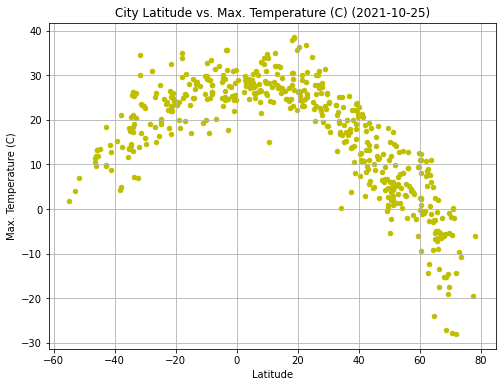

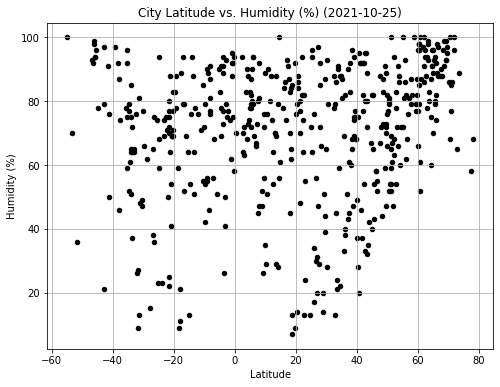

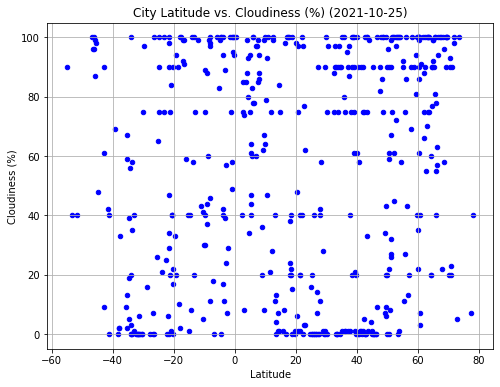

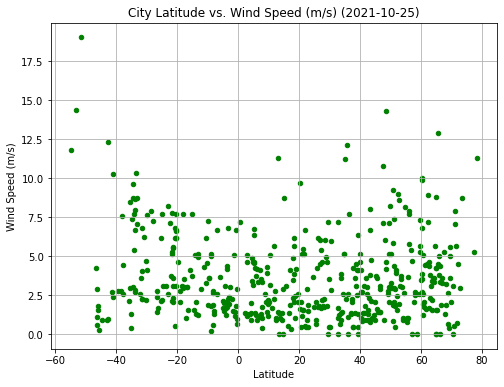

In [8]:
plot_labels = ["Max. Temperature (C)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (m/s)"]
for_figures = ["MaxTemp", "Humidity", "Cloudiness", "WindSpeed"]
colours = ["y", "k", "b", "g"]

for i, label in enumerate(plot_labels):
    city_df.plot.scatter(x = "Latitude", y = label, c = colours[i], title = f"City Latitude vs. {label} ({study_date})", figsize = (8, 6),  grid = True)
    name_fig = f"Figures/Latitude_{for_figures[i]}.png"
    plt.savefig(name_fig, bbox_inches='tight', dpi = 100)
    plt.show()

# Analysis:

- The figure "City Latitude vs. Max. Temperature" shows the expected trend where the maximum temperatures are at the equator (0 degrees). When going from higher to lower latitudes, a trend with a positive slope is observed for the Southern Hemisphere. On the other hand, the Northern Hemisphere has a similar tendency with a negative slope. This is confirmed with the figure "City Latitude vs. Max. Temperature" split by Hemispheres presented below.
- The points in figure "City Latitude vs. Humidity" demonstrate that the cities located near the equator (low latitudes) and at high latitudes are characterized by a high percentage of humidity. Contrary to medium latitudes, where the humidity varies at any rate.
- About the "City Latitude vs. Cloudiness", there is no apparent relationship. Regarding the "City Latitud vs. Wind Speed", it can be concluded that the majority of the values are below 6 m/s.

In [9]:
# Separating cities by their locations either in the Northern Hemisphere (>= 0 degrees latitude) or
# Southern Hemisphere (< 0 degrees latitude)

city_df_NH = city_df[city_df["Latitude"] >= 0].reset_index(drop = True).copy()
city_df_SH = city_df[city_df["Latitude"] < 0].reset_index(drop = True).copy()

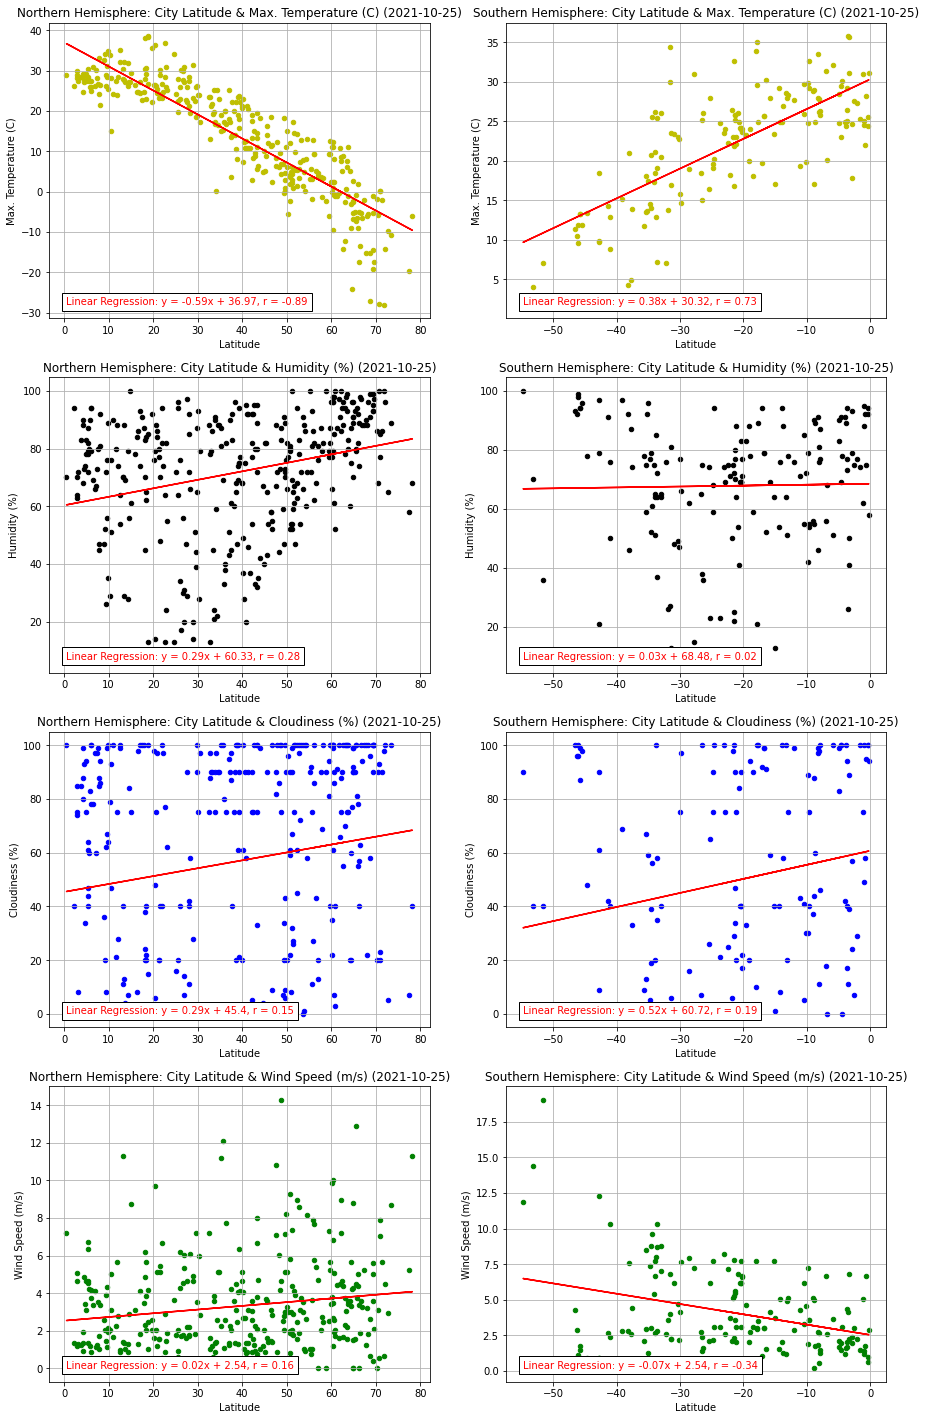

In [10]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(15,25))

slope_NH = []
intercept_NH = []
rvalue_NH = []
pvalue_NH = []
stderr_NH = []
regress_values_NH = []
slope_SH = []
intercept_SH = []
rvalue_SH = []
pvalue_SH = []
stderr_SH = []
regress_values_SH = []

for i, label in enumerate(plot_labels):
    
#     Performing linear regression for the Northern Hemisphere and storing the values in lists
    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(city_df_NH["Latitude"], city_df_NH[label])
    slope_NH.append(slope)
    intercept_NH.append(intercept)
    rvalue_NH.append(rvalue)
    pvalue_NH.append(pvalue)
    stderr_NH.append(stderr)
    
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    r_val = f"r = {round(rvalue,2)}"
    regress_values = city_df_NH["Latitude"] * slope + intercept
    regress_values_NH.append(regress_values)
    
    city_df_NH.plot.scatter(ax = axes[i, 0], x = "Latitude", y = label, c = colours[i], title = f"Northern Hemisphere: City Latitude & {label} ({study_date})", grid = True)
    axes[i,0].plot(city_df_NH["Latitude"],regress_values,"r-")
    axes[i,0].annotate(f"Linear Regression: {line_eq}, {r_val}", (city_df_NH["Latitude"].min(), city_df_NH[label].min()), fontsize=10,color="r", bbox=dict(facecolor='white', edgecolor='k'))
    
#     Performing linear regression for the Southern Hemisphere and storing the values in lists
    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(city_df_SH["Latitude"], city_df_SH[label])
    slope_SH.append(slope)
    intercept_SH.append(intercept)
    rvalue_SH.append(rvalue)
    pvalue_SH.append(pvalue)
    stderr_SH.append(stderr)
    
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    r_val = f"r = {round(rvalue,2)}"
    regress_values = city_df_SH["Latitude"] * slope + intercept
    regress_values_SH.append(regress_values)
    
    city_df_SH.plot.scatter(ax = axes[i, 1], x = "Latitude", y = label, c = colours[i], title = f"Southern Hemisphere: City Latitude & {label} ({study_date})", grid = True)
    axes[i,1].plot(city_df_SH["Latitude"],regress_values,"r-")
    axes[i,1].annotate(f"Linear Regression: {line_eq}, {r_val}", (city_df_SH["Latitude"].min(), city_df_SH[label].min()), fontsize=10,color="r",  bbox=dict(facecolor='white', edgecolor='k'))

plt.savefig("Figures/Complete_Analysis.png", bbox_inches='tight', dpi = 100)